In [79]:
# Import necessary libraries
from google.colab import files
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Ridge
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import PolynomialFeatures

import numpy as np

In [80]:
# Save to pandas dataframe
df = pd.read_csv('miami-housing.csv')

In [81]:
# Visualize column names
# For simplicity this data set has only numerical data
df.columns

Index(['LATITUDE', 'LONGITUDE', 'PARCELNO', 'SALE_PRC', 'LND_SQFOOT',
       'TOT_LVG_AREA', 'SPEC_FEAT_VAL', 'RAIL_DIST', 'OCEAN_DIST',
       'WATER_DIST', 'CNTR_DIST', 'SUBCNTR_DI', 'HWY_DIST', 'age',
       'avno60plus', 'month_sold', 'structure_quality'],
      dtype='object')

In [82]:
# Here we will split our data into testing and training
# We will be building a model to estimate SALE_PRC
# So we will need to drop that column from our input x
X = df.drop(['SALE_PRC'], axis = 1)
Y = df[['SALE_PRC']]

xtrain, xtest, ytrain, ytest = train_test_split(X, Y, test_size = 0.2)

In [83]:
# The first model we will make is a linear regression model
# A pipeline will process our data in a specified sequence
# We will be using Ridge() from SKLearn
# Ridge is a linear regression model that gives us a parameter alpha to regularize large weights to prevent over-fitting
ridge_model_1 = make_pipeline(
    # This will scale our features (x) so higher values features dont have more significance (prevent over-fitting)
    StandardScaler(),
    # alpha is the regularization parameter, essentially a standard scaler for the weights
    Ridge(alpha = 1)
)


In [84]:
# Cross_val_score will tell us how our model is expected to perform
# Outputs are R² scores on training data in 5 different folds
# R² scores closer to 1 indicate better model performance
# they represent the proportion of variance in the target variable explained by the model

print(cross_val_score(ridge_model_1, xtrain, ytrain, cv = 5))

[0.71613496 0.70903881 0.70296967 0.70427689 0.721865  ]


In [85]:
# This is ok, but we can improve it by using the same model
# Right now our model is a straight line (y = m1*x1 + m2*x2 ... + b)
# We can better match the data by adding polynomial features
ridge_model_2 = make_pipeline(
    PolynomialFeatures(degree = 3),
    StandardScaler(),
    Ridge(alpha = 1)
)


In [86]:
# Lets see the cross validation scores on our improved model
# Feel free to experiment with degree and alpha values
print(cross_val_score(ridge_model_2, xtrain, ytrain, cv = 5))

[0.90568976 0.89570779 0.90083569 0.90768762 0.89366286]


In [87]:
# Degree = 3 seems to be the sweet spot
# Note that we have not fit our model yet, so it is untrained
# Lets do that now, we will then use our model on our test data
ridge_model_2.fit(xtrain, ytrain)
ypred = ridge_model_2.predict(xtest)

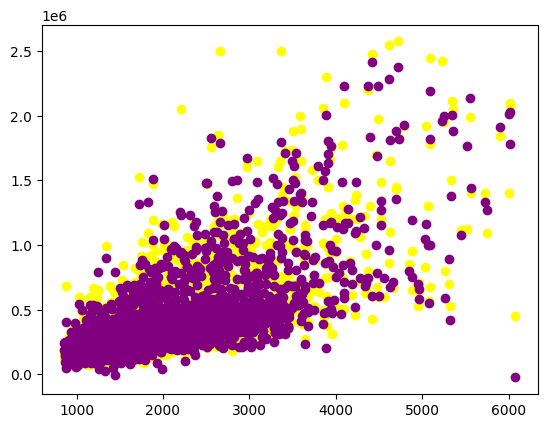

In [88]:
# To visualize our model, we will use MatplotLib
# We are limited in the number of dimensions we can visualize so we will use two dimensions
# To do so we will select what we think is most significant feature related to house price

# Lets plot out that column (TOT_LVG_AREA) in relation to the actual housing price in yellow
plt.scatter(xtest['TOT_LVG_AREA'], ytest, color = 'yellow')
# Now lets make a scatter plot of the TOT_LVG_AREA in relation to our actual model prediction in purple
plt.scatter(xtest['TOT_LVG_AREA'], ypred, color = 'purple')
# Selected colors are to be beneficial for color blind individuals
# Feel free to edit the code and visualize ridge_model_1 as well or different colors!

In [89]:
# Not too bad!
# now we can create our own dream home and have our model guess what it will cost
custom_input = pd.DataFrame([{
    'LATITUDE': 25.8910306063,
    'LONGITUDE': -80.1605605249,
    'PARCELNO': 622280070620,
    'LND_SQFOOT': 5000,
    'TOT_LVG_AREA': 4000,
    'SPEC_FEAT_VAL': 10000,
    'RAIL_DIST': 2000,
    'OCEAN_DIST': 2000,
    'WATER_DIST': 2000,
    'CNTR_DIST': 40000,
    'SUBCNTR_DI': 40000,
    'HWY_DIST': 18000,
    'age': 36,
    'avno60plus': 0,
    'month_sold': 8,
    'structure_quality': 4
    # Include ALL other feature columns here
}], columns=X.columns)

dream_house_price = ridge_model_2.predict(custom_input)
print(f"Predicted Sale Price: {dream_house_price[0]:,.2f}")
print("Congratulations! You now know how to perform linear regression with Scikit-learn, NumPy, and Pandas.")




Predicted Sale Price: 1,280,146.67
Congratulations! You now know how to perform linear regression with Scikit-learn, NumPy, and Pandas.
